🎓 Student Cognitive Skills & Performance Dashboard - ML Analysis
📊 Generating synthetic student dataset...
✅ Generated 250 student records
📋 Dataset shape: (250, 9)

📈 Dataset preview:
  student_id             name      class  comprehension  attention  focus  \
0    STU0001     Logan Taylor  Grade 11B           82.5       47.3   86.8   
1    STU0002      Logan Perez  Grade 11A           72.9       86.5  100.0   
2    STU0003   Phoenix Garcia  Grade 11A           84.7      100.0   49.6   
3    STU0004   Morgan Jackson  Grade 11A           97.8       88.6   81.0   
4    STU0005  Morgan Thompson   Grade 9A           71.5       42.7   61.6   

   retention  assessment_score  engagement_time  
0       52.3              71.1             50.3  
1       45.0              84.1             61.0  
2       51.4              60.5             42.3  
3       85.9              90.6             42.0  
4       51.9              67.4             35.5  

💾 Dataset saved as 'synthetic_students.csv'

🔍 CORR

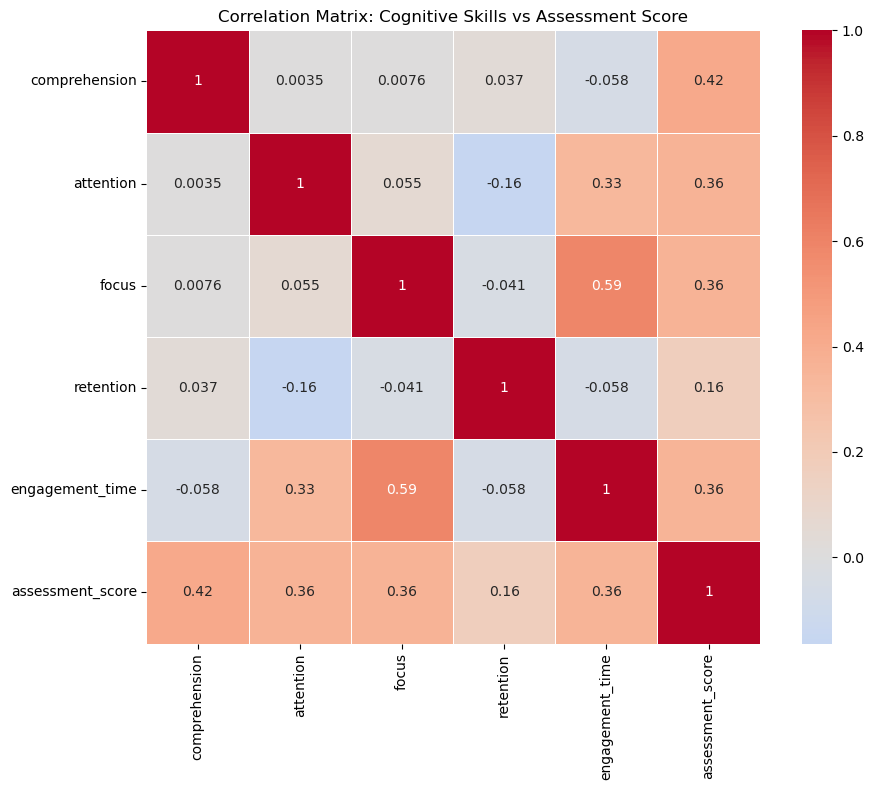


🤖 MACHINE LEARNING MODEL TRAINING
----------------------------------------
🎯 Model Performance:
  Mean Squared Error: 86.61
  R² Score: 0.336
  Model Accuracy: 33.6%

🔑 Feature Importance:
  Comprehension: 0.329
  Engagement_time: 0.181
  Focus: 0.176
  Attention: 0.172
  Retention: 0.141


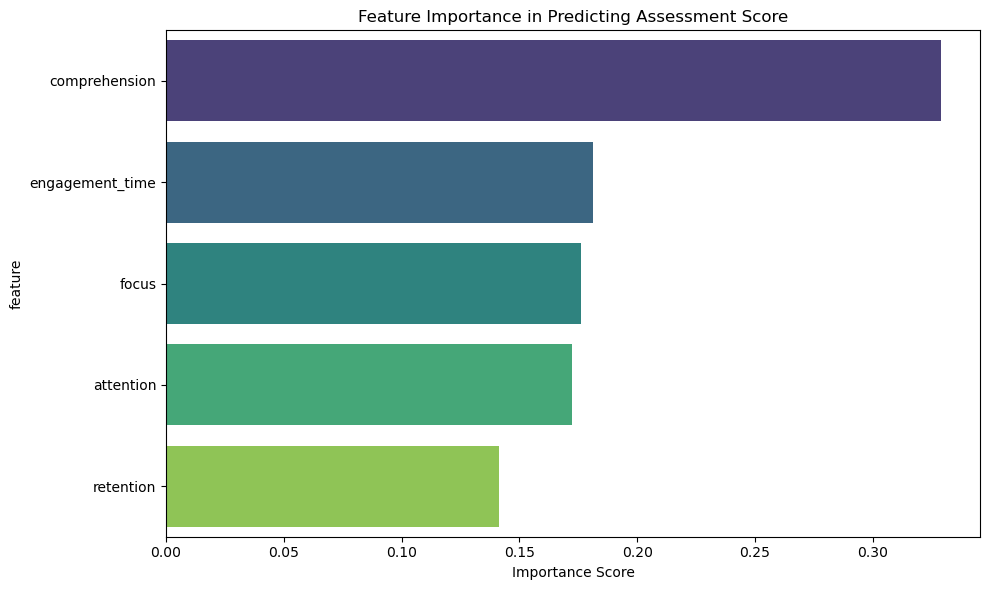


🎯 CLUSTERING ANALYSIS (K-MEANS)
-----------------------------------
📊 Learning Personas (Clusters):

🏷️  Cluster 0: Balanced Learners (68 students)
   Average Assessment Score: 67.6
   Comprehension: 66.0
   Attention: 60.5
   Focus: 79.9
   Retention: 69.4
   Engagement Time: 43.9

🏷️  Cluster 1: High Performers (53 students)
   Average Assessment Score: 82.2
   Comprehension: 81.6
   Attention: 83.1
   Focus: 83.3
   Retention: 74.2
   Engagement Time: 51.0

🏷️  Cluster 2: Attention Seekers (51 students)
   Average Assessment Score: 69.3
   Comprehension: 67.7
   Attention: 84.2
   Focus: 62.9
   Retention: 57.4
   Engagement Time: 39.1

🏷️  Cluster 3: Developing Learners (78 students)
   Average Assessment Score: 68.7
   Comprehension: 81.8
   Attention: 59.9
   Focus: 59.3
   Retention: 75.8
   Engagement Time: 31.2


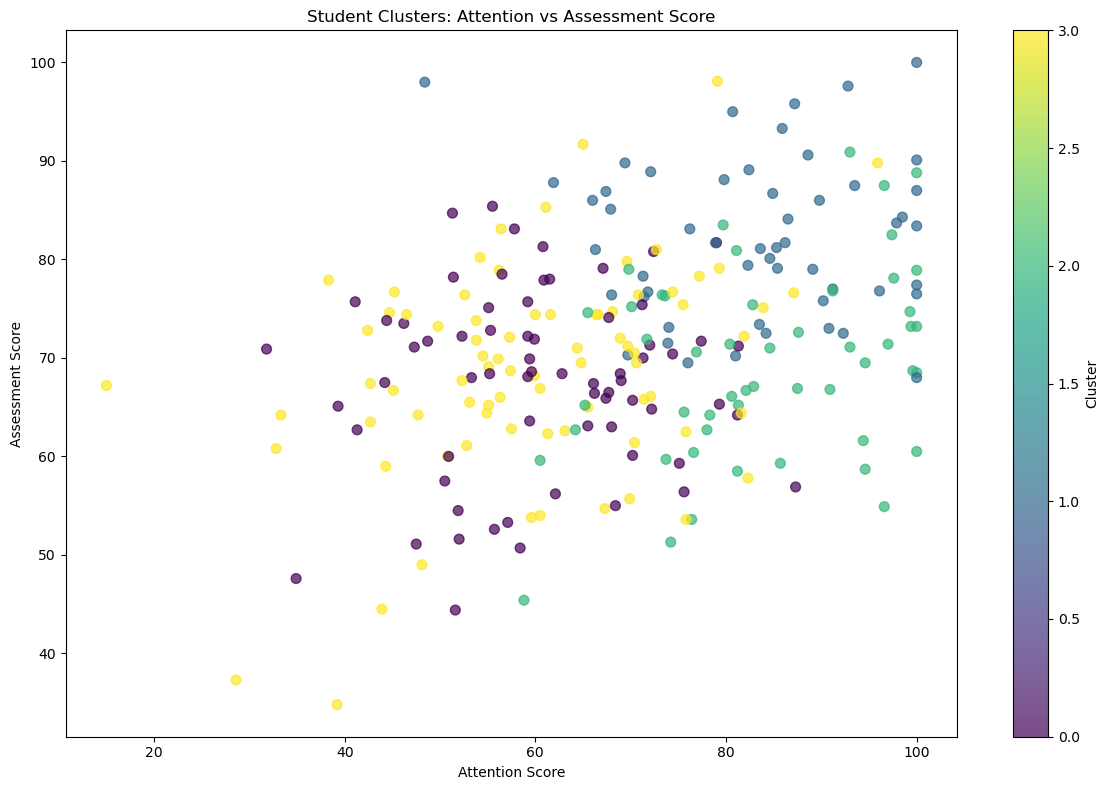


📋 KEY FINDINGS SUMMARY
🔍 Top Correlated Skill: Comprehension (r = 0.419)
🤖 Model Performance: 33.6% accuracy in predicting assessment scores
🎯 Most Important Feature: Comprehension
👥 Learning Personas: 4 distinct student clusters identified

💾 Updated dataset with clusters saved as 'synthetic_students.csv'

✅ Analysis Complete! Ready for dashboard integration.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

print("🎓 Student Cognitive Skills & Performance Dashboard - ML Analysis")
print("=" * 60)

# Generate synthetic student dataset
def generate_synthetic_students(n_students=250):
    """Generate synthetic student data with realistic correlations"""
    
    # Generate base cognitive skills with some correlation structure
    comprehension = np.random.normal(75, 15, n_students)
    attention = np.random.normal(70, 18, n_students)
    focus = np.random.normal(72, 16, n_students)
    retention = np.random.normal(68, 17, n_students)
    
    # Engagement time influenced by attention and focus
    engagement_time = (attention * 0.3 + focus * 0.4 + np.random.normal(0, 10, n_students)) * 0.8
    
    # Assessment score influenced by all cognitive skills
    assessment_score = (
        comprehension * 0.35 + 
        attention * 0.25 + 
        focus * 0.20 + 
        retention * 0.15 + 
        engagement_time * 0.05 + 
        np.random.normal(0, 8, n_students)
    )
    
    # Ensure values are within reasonable ranges
    comprehension = np.clip(comprehension, 20, 100)
    attention = np.clip(attention, 15, 100)
    focus = np.clip(focus, 20, 100)
    retention = np.clip(retention, 15, 100)
    engagement_time = np.clip(engagement_time, 10, 120)
    assessment_score = np.clip(assessment_score, 30, 100)
    
    # Generate student metadata
    classes = ['Grade 9A', 'Grade 9B', 'Grade 10A', 'Grade 10B', 'Grade 11A', 'Grade 11B']
    first_names = ['Alex', 'Jordan', 'Taylor', 'Morgan', 'Casey', 'Riley', 'Avery', 'Quinn', 
                   'Sage', 'River', 'Skylar', 'Phoenix', 'Rowan', 'Emery', 'Finley', 'Hayden',
                   'Jamie', 'Kendall', 'Logan', 'Parker', 'Reese', 'Sam', 'Blake', 'Cameron']
    last_names = ['Smith', 'Johnson', 'Williams', 'Brown', 'Jones', 'Garcia', 'Miller', 'Davis',
                  'Rodriguez', 'Martinez', 'Hernandez', 'Lopez', 'Gonzalez', 'Wilson', 'Anderson',
                  'Thomas', 'Taylor', 'Moore', 'Jackson', 'Martin', 'Lee', 'Perez', 'Thompson', 'White']
    
    students_data = []
    for i in range(n_students):
        student_id = f"STU{i+1:04d}"
        name = f"{np.random.choice(first_names)} {np.random.choice(last_names)}"
        class_name = np.random.choice(classes)
        
        students_data.append({
            'student_id': student_id,
            'name': name,
            'class': class_name,
            'comprehension': round(comprehension[i], 1),
            'attention': round(attention[i], 1),
            'focus': round(focus[i], 1),
            'retention': round(retention[i], 1),
            'assessment_score': round(assessment_score[i], 1),
            'engagement_time': round(engagement_time[i], 1)
        })
    
    return pd.DataFrame(students_data)

# Generate the dataset
print("📊 Generating synthetic student dataset...")
df = generate_synthetic_students(250)
print(f"✅ Generated {len(df)} student records")
print(f"📋 Dataset shape: {df.shape}")
print("\n📈 Dataset preview:")
print(df.head())

# Save dataset
df.to_csv('synthetic_students.csv', index=False)
print(f"\n💾 Dataset saved as 'synthetic_students.csv'")

# Correlation Analysis
print("\n🔍 CORRELATION ANALYSIS")
print("-" * 30)

cognitive_skills = ['comprehension', 'attention', 'focus', 'retention', 'engagement_time']
correlation_matrix = df[cognitive_skills + ['assessment_score']].corr()

print("📊 Correlation with Assessment Score:")
correlations_with_score = correlation_matrix['assessment_score'].drop('assessment_score').sort_values(ascending=False)
for skill, corr in correlations_with_score.items():
    print(f"  {skill.capitalize()}: {corr:.3f}")

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5)
plt.title('Correlation Matrix: Cognitive Skills vs Assessment Score')
plt.tight_layout()
plt.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Machine Learning Model Training
print("\n🤖 MACHINE LEARNING MODEL TRAINING")
print("-" * 40)

# Prepare features and target
X = df[cognitive_skills]
y = df['assessment_score']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"🎯 Model Performance:")
print(f"  Mean Squared Error: {mse:.2f}")
print(f"  R² Score: {r2:.3f}")
print(f"  Model Accuracy: {r2*100:.1f}%")

# Feature importance
feature_importance = pd.DataFrame({
    'feature': cognitive_skills,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print(f"\n🔑 Feature Importance:")
for _, row in feature_importance.iterrows():
    print(f"  {row['feature'].capitalize()}: {row['importance']:.3f}")

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='importance', y='feature', palette='viridis')
plt.title('Feature Importance in Predicting Assessment Score')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

# Clustering Analysis
print("\n🎯 CLUSTERING ANALYSIS (K-MEANS)")
print("-" * 35)

# Standardize features for clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to dataframe
df['cluster'] = clusters

# Analyze clusters
print("📊 Learning Personas (Clusters):")
cluster_analysis = df.groupby('cluster')[cognitive_skills + ['assessment_score']].mean()

personas = {
    0: "Balanced Learners",
    1: "High Performers", 
    2: "Attention Seekers",
    3: "Developing Learners"
}

for cluster_id in range(4):
    cluster_data = cluster_analysis.loc[cluster_id]
    cluster_size = len(df[df['cluster'] == cluster_id])
    
    print(f"\n🏷️  Cluster {cluster_id}: {personas.get(cluster_id, f'Group {cluster_id}')} ({cluster_size} students)")
    print(f"   Average Assessment Score: {cluster_data['assessment_score']:.1f}")
    print(f"   Comprehension: {cluster_data['comprehension']:.1f}")
    print(f"   Attention: {cluster_data['attention']:.1f}")
    print(f"   Focus: {cluster_data['focus']:.1f}")
    print(f"   Retention: {cluster_data['retention']:.1f}")
    print(f"   Engagement Time: {cluster_data['engagement_time']:.1f}")

# Visualize clusters
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df['attention'], df['assessment_score'], 
                     c=df['cluster'], cmap='viridis', alpha=0.7, s=50)
plt.xlabel('Attention Score')
plt.ylabel('Assessment Score')
plt.title('Student Clusters: Attention vs Assessment Score')
plt.colorbar(scatter, label='Cluster')
plt.tight_layout()
plt.savefig('clusters_visualization.png', dpi=300, bbox_inches='tight')
plt.show()

# Key Findings Summary
print("\n📋 KEY FINDINGS SUMMARY")
print("=" * 25)

top_correlated_skill = correlations_with_score.index[0]
top_correlation = correlations_with_score.iloc[0]

print(f"🔍 Top Correlated Skill: {top_correlated_skill.capitalize()} (r = {top_correlation:.3f})")
print(f"🤖 Model Performance: {r2*100:.1f}% accuracy in predicting assessment scores")
print(f"🎯 Most Important Feature: {feature_importance.iloc[0]['feature'].capitalize()}")
print(f"👥 Learning Personas: 4 distinct student clusters identified")

# Save updated dataset with clusters
df.to_csv('synthetic_students.csv', index=False)
print(f"\n💾 Updated dataset with clusters saved as 'synthetic_students.csv'")

print("\n✅ Analysis Complete! Ready for dashboard integration.")
